In [1]:
import pandas as pd

In [126]:
medical_df = pd.read_csv("insurance.csv")

In [3]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [7]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] =14
matplotlib.rcParams['figure.figsize'] =(10,6)
matplotlib.rcParams['figure.facecolor'] ='#00000000'

In [8]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [9]:
fig = px.histogram(medical_df,x='age',marginal='box',nbins=47,title='Distribution of age')
fig.update_layout(bargap=0.1)
fig.show()

In [10]:
fig = px.histogram(medical_df,x='bmi',marginal='box',color_discrete_sequence=['red'],title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

In [11]:
fig = px.histogram(medical_df,x='charges',marginal='box',color='smoker',color_discrete_sequence=['green','grey'],title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [12]:
fig = px.histogram(medical_df,x='region',marginal='box',color='sex',color_discrete_sequence=['blue','pink'],title='Distribution of regions')
fig.update_layout(bargap=0.1)
fig.show()

In [13]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [14]:
px.histogram(medical_df,x='smoker',color='sex',title='Smoker')

In [15]:
fig = px.scatter(medical_df, x='age',y='charges',color='smoker',opacity=0.8,
                 hover_data=['sex'], title='Age vs Charges')
fig.update_traces(marker_size=5)
fig.show()

In [16]:
fig = px.scatter(medical_df, x='bmi',y='charges',color='smoker',opacity=0.8,
                 hover_data=['sex'], title='BMI vs Charges')
fig.update_traces(marker_size=5)
fig.show()

In [17]:
px.violin(medical_df,x='children',y='charges',title='Children vs Charges')

In [18]:
medical_df.charges.corr(medical_df.age)

0.2990081933306476

In [19]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362895

In [20]:
medical_df.charges.corr(medical_df.children)

0.06799822684790478

In [21]:
smoker_values={'no':0,'yes':1}
smoker_numeric = medical_df.smoker.map(smoker_values)
smoker_numeric

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [22]:
medical_df.charges.corr(smoker_numeric)

0.787251430498478

In [23]:
medical_df.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


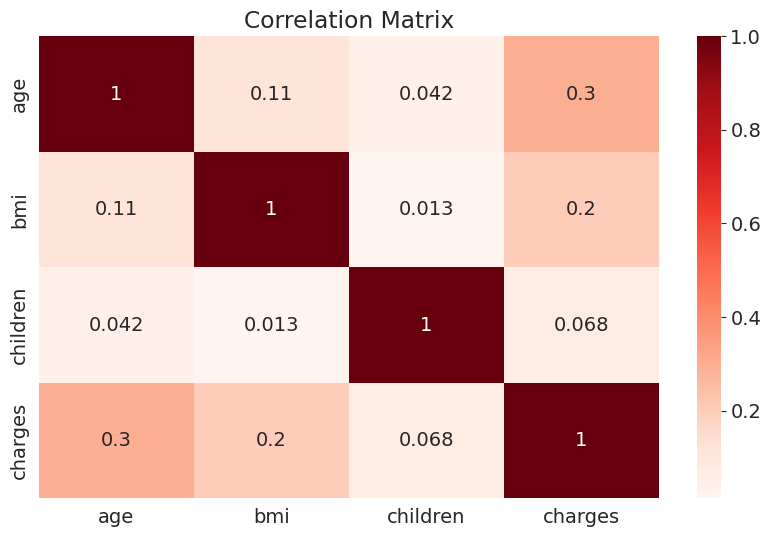

In [24]:
sns.heatmap(medical_df.corr(numeric_only=True),cmap='Reds',annot=True)
plt.title('Correlation Matrix');

Linear Regression Using a Single Feature

In [25]:
non_smoker_df = medical_df[medical_df.smoker=='no']

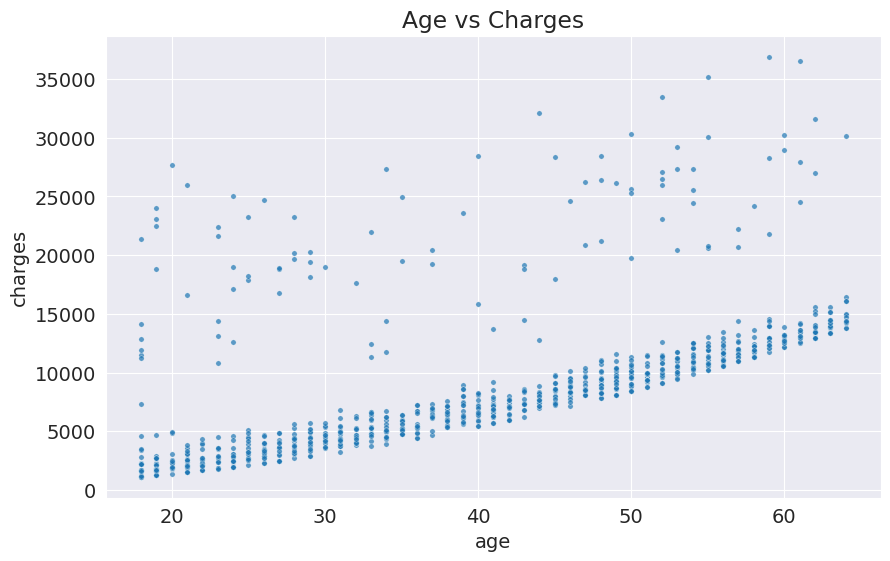

In [26]:
plt.title('Age vs Charges')
sns.scatterplot(data=non_smoker_df,x='age',y='charges',alpha=0.7,s=15);

In [27]:
def estimate_charges(age,w,b):
  return w*age+b

In [28]:
w= 50
b=100

In [29]:
estimate_charges(40,w,b)

2100

In [30]:
ages=non_smoker_df.age

In [31]:
estimated_charges = estimate_charges(ages,w,b)

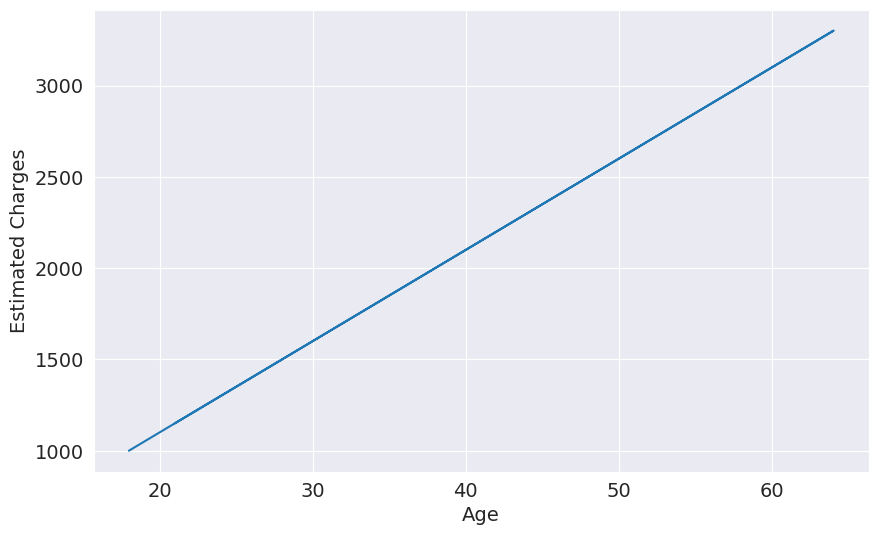

In [32]:
plt.plot(ages,estimated_charges);
plt.xlabel('Age');
plt.ylabel('Estimated Charges');

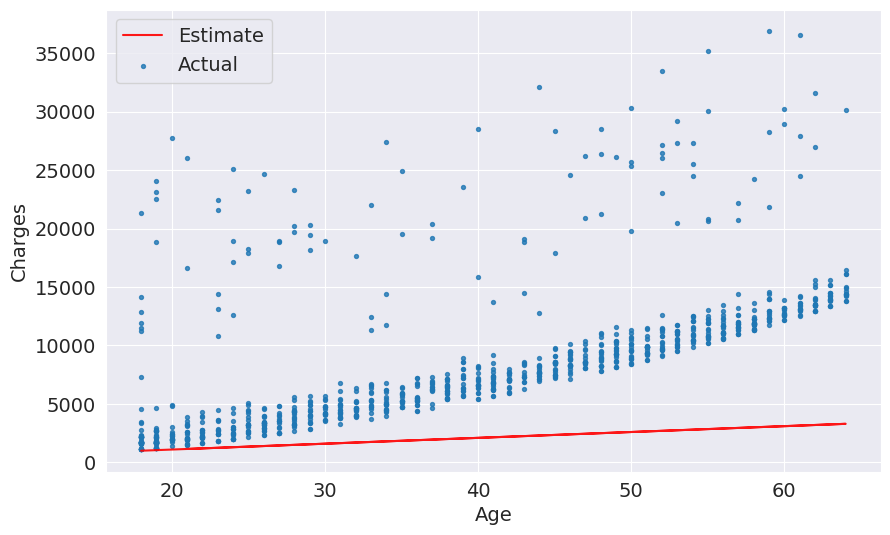

In [33]:
target = non_smoker_df.charges

plt.plot(ages,estimated_charges,'r',alpha=0.9);

plt.scatter(ages,target,s=8,alpha=0.8);
plt.xlabel('Age');
plt.ylabel('Charges');
plt.legend(['Estimate','Actual']);

In [34]:
def try_parameters(w,b):
  ages = non_smoker_df.age
  target = non_smoker_df.charges

  estimated_charges = estimate_charges(ages,w,b)

  plt.plot(ages,estimated_charges,'r',alpha=0.9);

  plt.scatter(ages,target,s=8,alpha=0.8);
  plt.xlabel('Age');
  plt.ylabel('Charges');
  plt.legend(['Estimate','Actual']);

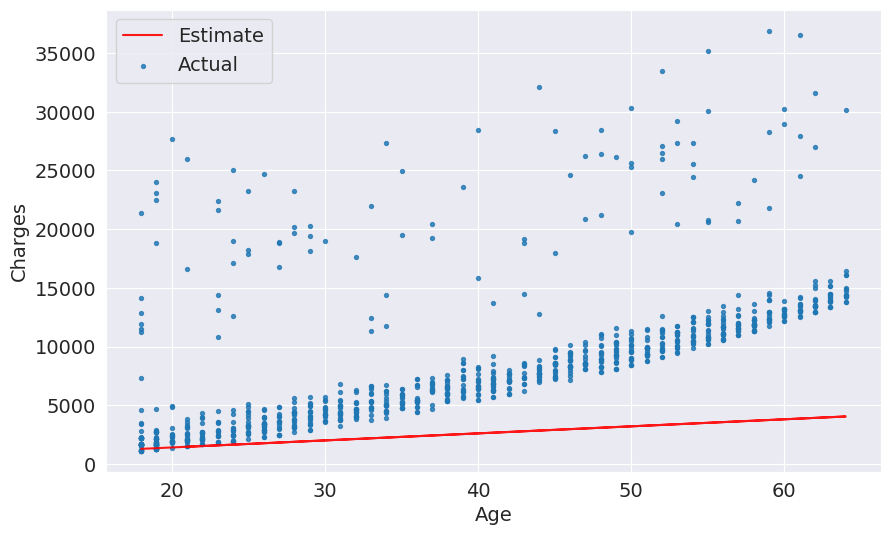

In [35]:
try_parameters(60,200)

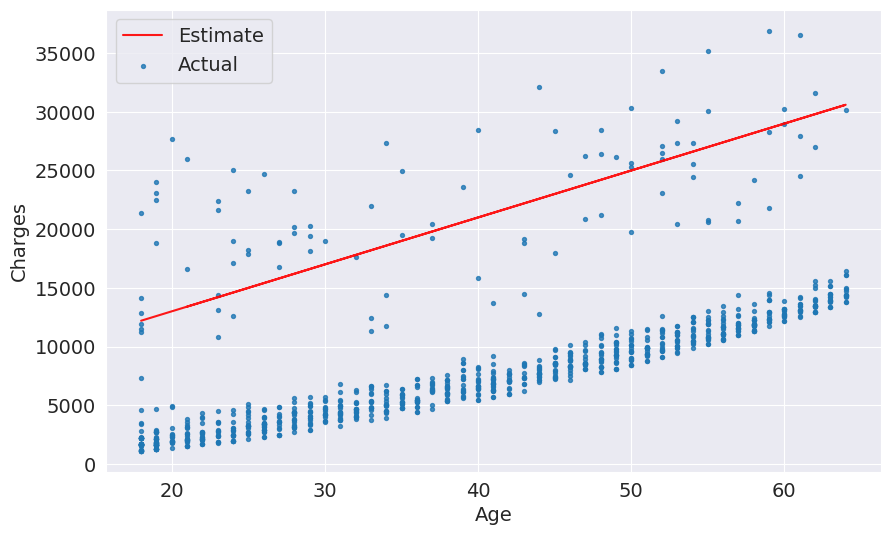

In [36]:
try_parameters(400,5000)

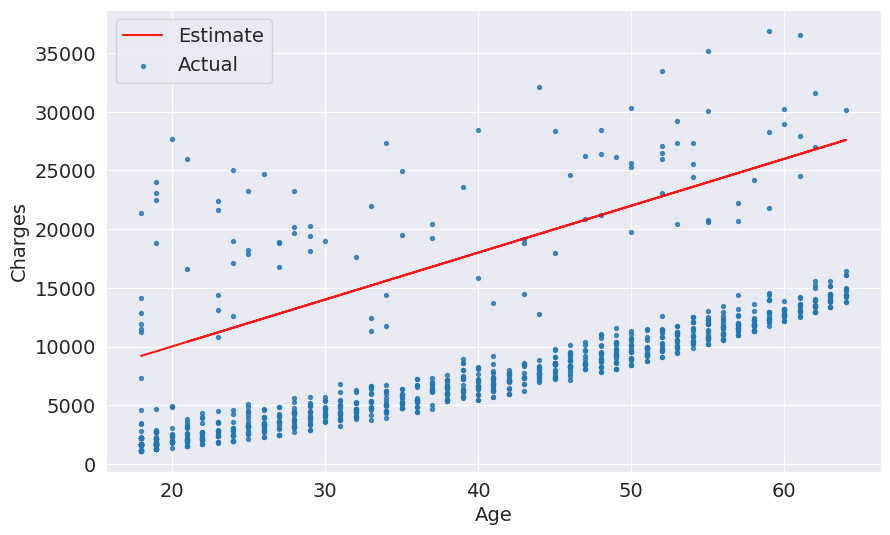

In [37]:
try_parameters(400,2000)

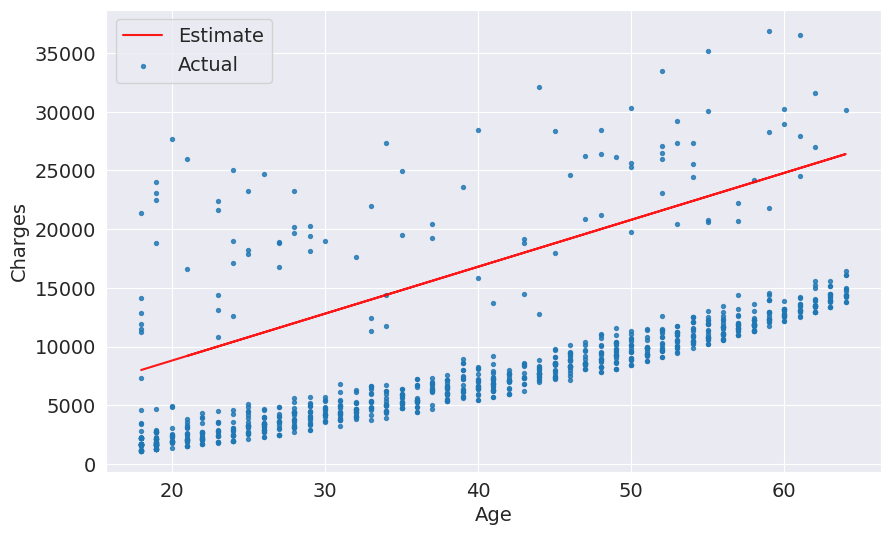

In [38]:
try_parameters(400,800)

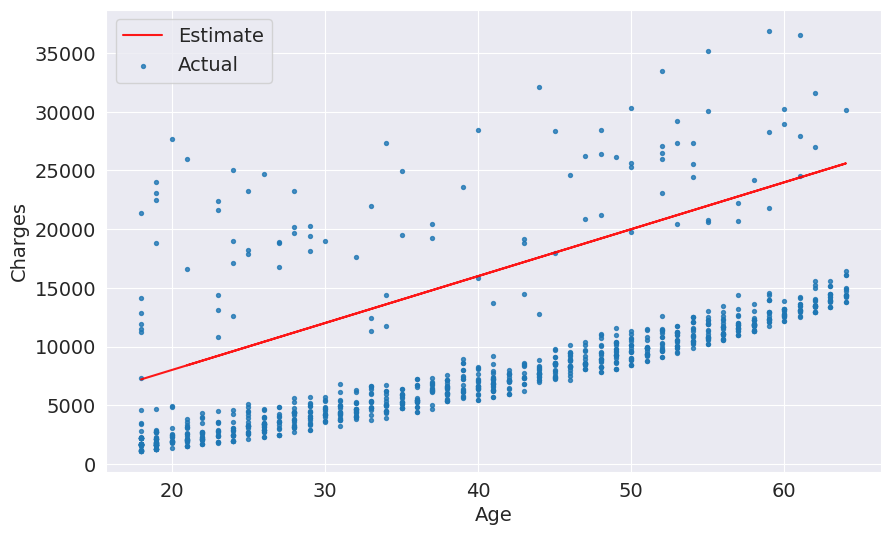

In [39]:
try_parameters(400,0)

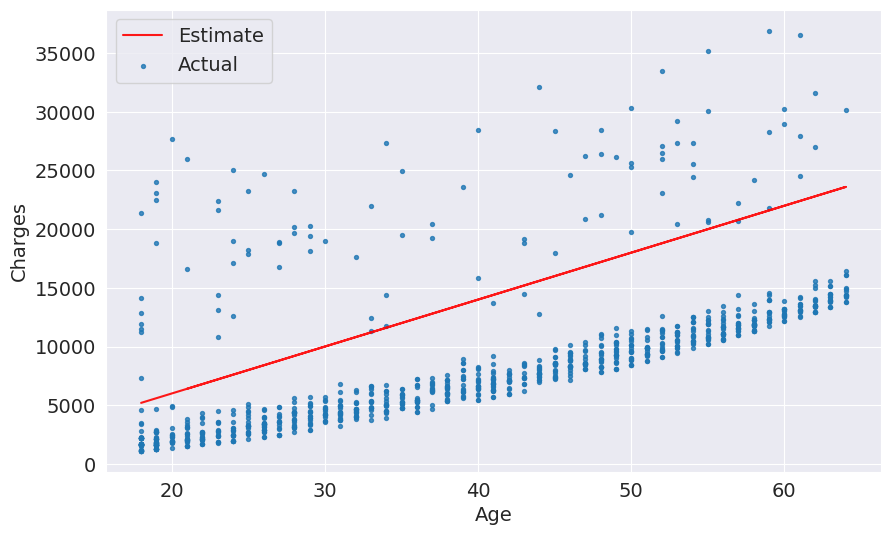

In [40]:
try_parameters(400,-2000)

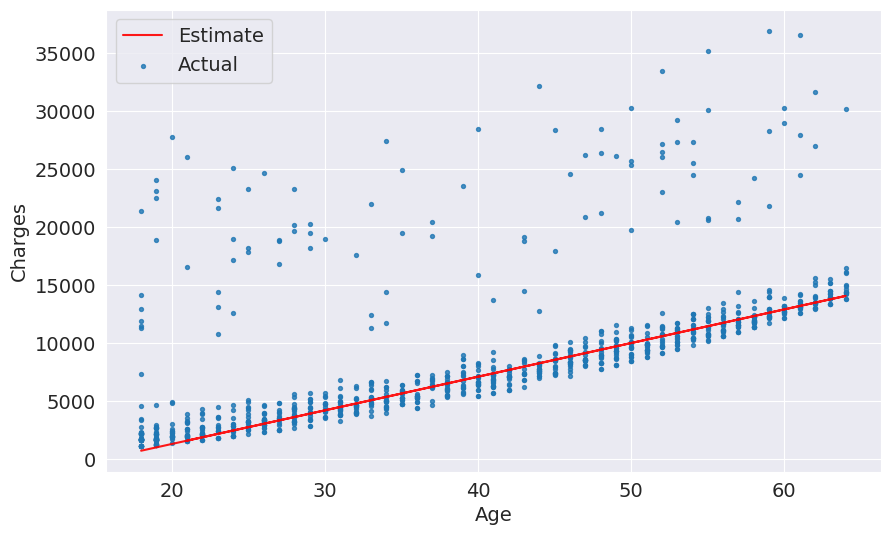

In [41]:
try_parameters(290,-4500)

In [42]:
targets = non_smoker_df.charges
ages=non_smoker_df.age

In [43]:
estimated_charges = estimate_charges(ages,290,-4500)

In [44]:
predictions = estimated_charges

In [45]:
import numpy as np

In [46]:
def rmse(targets,predictions):
  return np.sqrt(np.mean(np.square(targets-predictions)))

In [47]:
rmse(targets,predictions)

4912.152811314494

In [48]:
def new_try_parameters(w,b):
  ages=non_smoker_df.age
  targets = non_smoker_df.charges
  predictions = estimate_charges(ages,w,b)

  plt.plot(ages,predictions,'r',alpha=0.9);

  plt.scatter(ages,target,s=8,alpha=0.8);
  plt.xlabel('Age');
  plt.ylabel('Charges');
  plt.legend(['Prediction','Actual']);

  loss=rmse(targets,predictions)
  print("RMSE loss:", loss)

RMSE loss: 4816.941379466545


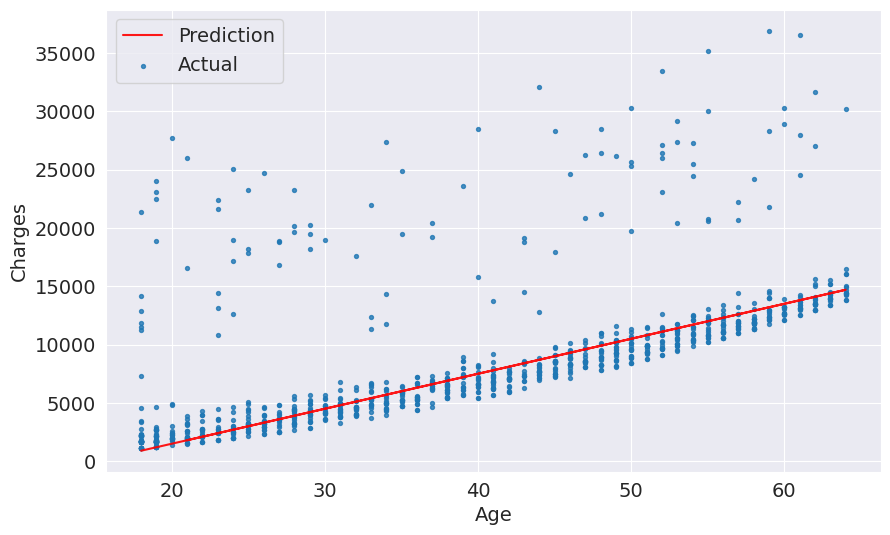

In [49]:
new_try_parameters(300,-4500)

RMSE loss: 4738.100587568052


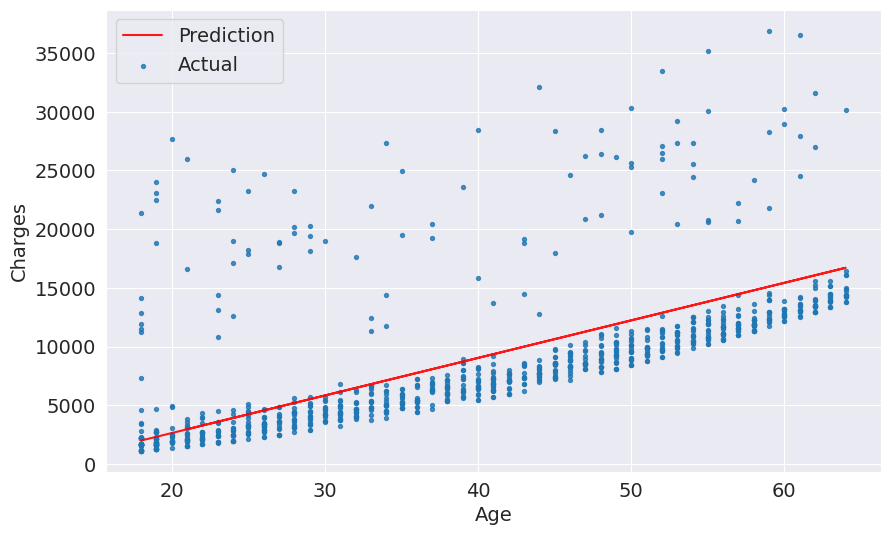

In [50]:
new_try_parameters(320,-3770)

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
lrmodel = LinearRegression()

In [53]:
inputs =non_smoker_df[['age']]
targets = non_smoker_df.charges
print('input shape:', inputs.shape)
print('target shape:', targets.shape)

input shape: (1064, 1)
target shape: (1064,)


In [54]:
lrmodel.fit(inputs,targets)

LinearRegression()

In [55]:
lrmodel.predict(np.array([[23],[37],[61]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [56]:
predictions = lrmodel.predict(inputs)

In [57]:
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [58]:
rmse(targets,predictions)

4662.505766636395

In [59]:
lrmodel.coef_

array([267.24891283])

In [60]:
lrmodel.intercept_

-2091.4205565650864

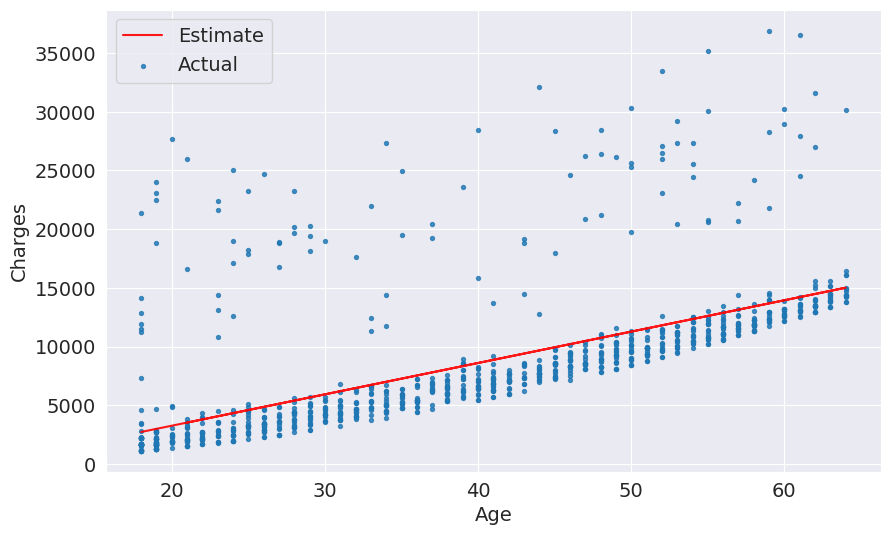

In [61]:
try_parameters(lrmodel.coef_,lrmodel.intercept_)

In [62]:
from sklearn.linear_model import SGDRegressor
sgdmodel = SGDRegressor()

In [63]:
sgdmodel.fit(inputs,targets)

SGDRegressor()

In [64]:
sgdmodel.predict(np.array([[23],[37],[61]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but SGDRegressor was fitted with feature names



array([ 4343.58386221,  6479.54871728, 10141.20275454])

In [65]:
predictions = sgdmodel.predict(inputs)

In [66]:
rmse(targets,predictions)

5184.170668139689

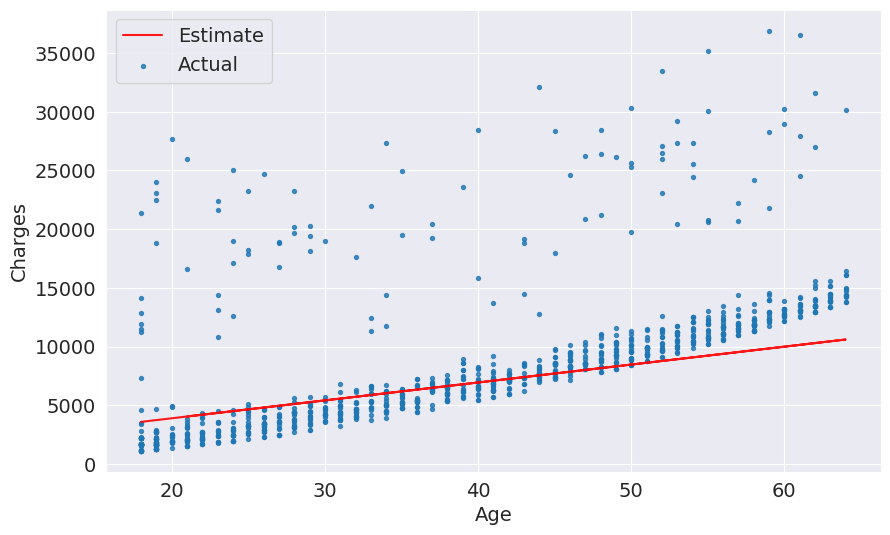

In [67]:
try_parameters(sgdmodel.coef_,sgdmodel.intercept_)

In [68]:
inputs =smoker_numeric.to_frame()
targets = medical_df.charges
print('input shape:', inputs.shape)
print('target shape:', targets.shape)

input shape: (1338, 1)
target shape: (1338,)


In [69]:
lrmodel.fit(inputs,targets)
predictions = lrmodel.predict(inputs)
rmse(targets,predictions)

7464.630999197847

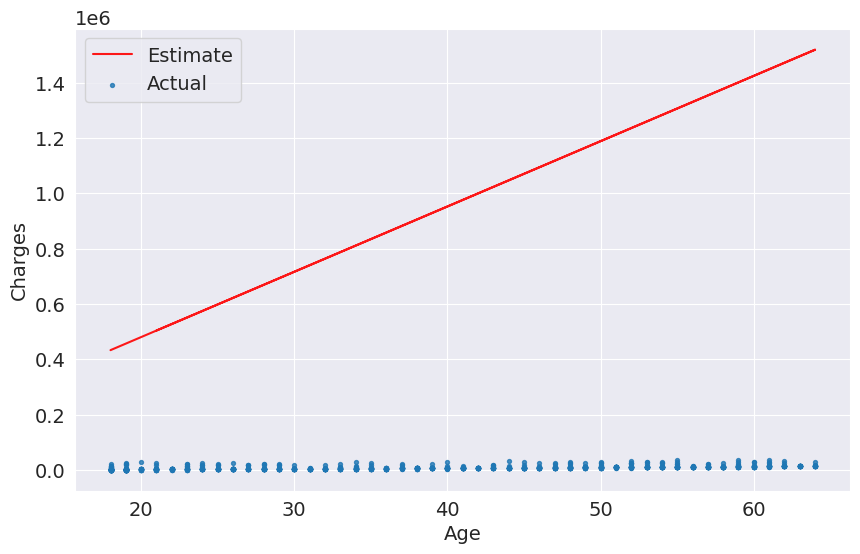

In [70]:
try_parameters(lrmodel.coef_,lrmodel.intercept_)

In [71]:
sgdmodel.fit(inputs,targets)
predictions = sgdmodel.predict(inputs)
rmse(targets,predictions)

7464.961895064216

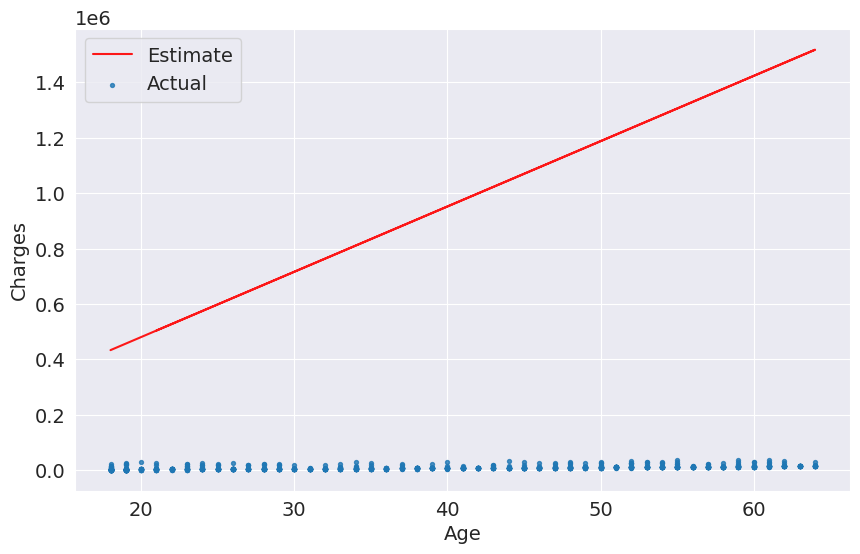

In [72]:
try_parameters(sgdmodel.coef_,sgdmodel.intercept_)

In [73]:
len(medical_df)

1338

In [74]:
medical_df['smoker']=smoker_numeric
inputs = medical_df[['age','smoker']]
targets = medical_df.charges
print('input shape:', inputs.shape)
print('target shape:', targets.shape)

input shape: (1338, 2)
target shape: (1338,)


In [75]:
lrmodel.fit(inputs,targets)
predictions = lrmodel.predict(inputs)
rmse(targets,predictions)

6389.5769572264235

In [76]:
lrmodel.coef_

array([  274.87118587, 23855.30481666])

In [77]:
lrmodel.intercept_

-2391.6263593585463

In [78]:
inputs =non_smoker_df[['age','bmi']]
targets = non_smoker_df.charges
print('input shape:', inputs.shape)
print('target shape:', targets.shape)

input shape: (1064, 2)
target shape: (1064,)


In [79]:
lrmodel.fit(inputs,targets)
predictions = lrmodel.predict(inputs)
rmse(targets,predictions)

4662.3128354612945

In [80]:
lrmodel.coef_

array([266.87657817,   7.07547666])

In [81]:
lrmodel.intercept_

-2293.6320906488727

In [82]:
non_smoker_df.charges.corr(non_smoker_df.bmi)

0.0840365431283327

In [83]:
fig = px.scatter(non_smoker_df, x='bmi',y='charges',title='BMI vs Charges')
fig.update_traces(marker_size=5)
fig.show()

In [84]:
inputs =non_smoker_df[['age','bmi','children']]
targets = non_smoker_df.charges
print('input shape:', inputs.shape)
print('target shape:', targets.shape)

input shape: (1064, 3)
target shape: (1064,)


In [85]:
lrmodel.fit(inputs,targets)
predictions = lrmodel.predict(inputs)
rmse(targets,predictions)

4608.470405038247

In [86]:
lrmodel.coef_

array([265.2938443 ,   5.27956313, 580.65965053])

In [87]:
lrmodel.intercept_

-2809.2976032235892

In [88]:
medical_df['smoker']=smoker_numeric
inputs = medical_df[['age','smoker','bmi','children']]
targets = medical_df.charges
print('input shape:', inputs.shape)
print('target shape:', targets.shape)

input shape: (1338, 4)
target shape: (1338,)


In [89]:
lrmodel.fit(inputs,targets)
predictions = lrmodel.predict(inputs)
rmse(targets,predictions)

6056.439217188081

In [90]:
lrmodel.coef_

array([  257.84950728, 23811.3998446 ,   321.85140247,   473.50231561])

In [91]:
lrmodel.intercept_

-12102.769362727908

In [92]:
inputs = medical_df[['age','bmi','children']]
targets = medical_df.charges
print('input shape:', inputs.shape)
print('target shape:', targets.shape)

input shape: (1338, 3)
target shape: (1338,)


In [93]:
lrmodel.fit(inputs,targets)
predictions = lrmodel.predict(inputs)
rmse(targets,predictions)

11355.317901125973

In [94]:
lrmodel.coef_

array([239.99447429, 332.0833645 , 542.86465225])

In [95]:
lrmodel.intercept_

-6916.243347787033

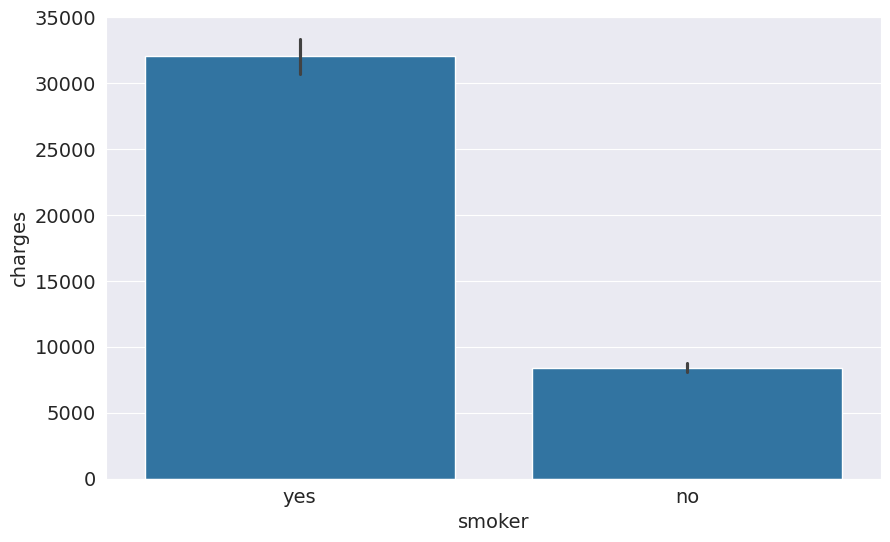

In [98]:
sns.barplot(data=medical_df,x='smoker',y='charges');

In [100]:
smoker_codes = {'no':0,'yes':1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)

In [101]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [105]:
medical_df.charges.corr(medical_df.smoker_code)

0.787251430498478

In [106]:
inputs = medical_df[['age','bmi','children','smoker_code']]
targets = medical_df.charges
print('input shape:', inputs.shape)
print('target shape:', targets.shape)

input shape: (1338, 4)
target shape: (1338,)


In [107]:
lrmodel.fit(inputs,targets)
predictions = lrmodel.predict(inputs)
rmse(targets,predictions)

6056.439217188081

<Axes: xlabel='sex', ylabel='charges'>

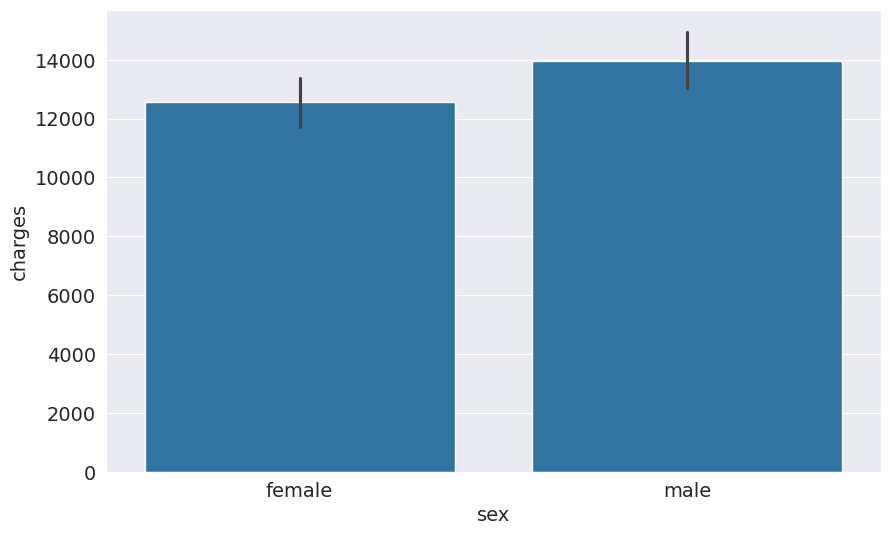

In [108]:
sns.barplot(data=medical_df,x='sex',y='charges')

In [109]:
sex_codes = {'female':0,'male':1}
medical_df['sex_code'] = medical_df.sex.map(sex_codes)

In [110]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


In [111]:
medical_df.charges.corr(medical_df.sex_code)

0.057292062202025484

In [112]:
inputs = medical_df[['age','bmi','children','smoker_code','sex_code']]
targets = medical_df.charges
print('input shape:', inputs.shape)
print('target shape:', targets.shape)

input shape: (1338, 5)
target shape: (1338,)


In [113]:
lrmodel.fit(inputs,targets)
predictions = lrmodel.predict(inputs)
rmse(targets,predictions)

6056.100708754546

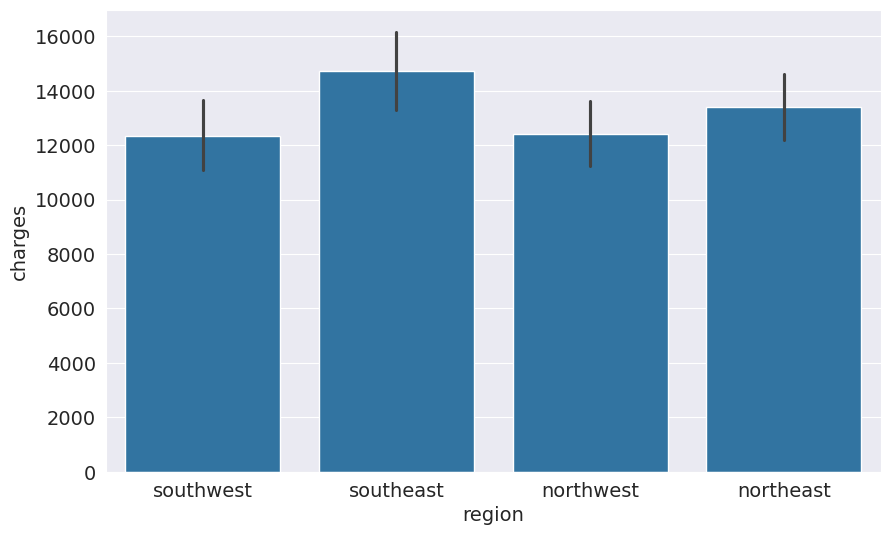

In [114]:
sns.barplot(data=medical_df,x='region',y='charges');

In [115]:
from sklearn import preprocessing
onehotenc = preprocessing.OneHotEncoder()
onehotenc.fit(medical_df[['region']])
onehotenc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [116]:
one_hot = onehotenc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [117]:
medical_df[['northeast','northwest','southeast','southwest']]=one_hot

In [118]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [119]:
inputs = medical_df[['age','bmi','children','smoker_code','sex_code','northeast','northwest','southeast','southwest']]
targets = medical_df.charges
print('input shape:', inputs.shape)
print('target shape:', targets.shape)

input shape: (1338, 9)
target shape: (1338,)


In [120]:
lrmodel.fit(inputs,targets)
predictions = lrmodel.predict(inputs)
rmse(targets,predictions)

6041.6796511744515

In [121]:
lrmodel.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [122]:
lrmodel.intercept_

-12525.547811195444

In [133]:
input_cols =inputs.columns.values

In [134]:
weighted_df = pd.DataFrame({'features':np.append(input_cols,1),
                            'weight':np.append(lrmodel.coef_,lrmodel.intercept_)})
weighted_df

,features,weight
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smoker_code,23848.534542
4,sex_code,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,1,-12525.547811
